In [1]:
install.packages("ggdag")

Installing package into ‘/srv/r’
(as ‘lib’ is unspecified)

also installing the dependencies ‘V8’, ‘dagitty’




In [1]:
library(ggdag)
library(ggplot2)


Attaching package: ‘ggdag’


The following object is masked from ‘package:stats’:

    filter




In [3]:
dag <- dagitty::dagitty("dag {
    y <- x <- z1 <- v -> z2 -> y
    z1 <- w1 <-> w2 -> z2
    x <- w1 -> y
    x <- w2 -> y
    x [exposure]
    y [outcome]
  }")

In [4]:
tidy_dag <- tidy_dagitty(dag)

tidy_dag

# A DAG with 7 nodes and 12 edges
#
# Exposure: x
# Outcome: y
#
# A tibble: 13 × 8
   name      x     y direction to     xend  yend circular
   <chr> <dbl> <dbl> <fct>     <chr> <dbl> <dbl> <lgl>   
 1 v     -2.77 -3.61 ->        z1    -1.94 -2.46 FALSE   
 2 v     -2.77 -3.61 ->        z2    -3.93 -2.80 FALSE   
 3 w1    -2.59 -1.10 ->        x     -2.61 -1.73 FALSE   
 4 w1    -2.59 -1.10 ->        y     -3.75 -1.30 FALSE   
 5 w1    -2.59 -1.10 ->        z1    -1.94 -2.46 FALSE   
 6 w1    -2.59 -1.10 <->       w2    -3.53 -1.89 FALSE   
 7 w2    -3.53 -1.89 ->        x     -2.61 -1.73 FALSE   
 8 w2    -3.53 -1.89 ->        y     -3.75 -1.30 FALSE   
 9 w2    -3.53 -1.89 ->        z2    -3.93 -2.80 FALSE   
10 x     -2.61 -1.73 ->        y     -3.75 -1.30 FALSE   
11 y     -3.75 -1.30 NA        NA    NA    NA    FALSE   
12 z1    -1.94 -2.46 ->        x     -2.61 -1.73 FALSE   
13 z2    -3.93 -2.80 ->        y     -3.75 -1.30 FALSE   

In [2]:
tidy_ggdag <- dagify(
  y ~ x + z2 + w2 + w1,
  x ~ z1 + w1 + w2,
  z1 ~ w1 + v,
  z2 ~ w2 + v,
  w1 ~ ~w2, # bidirected path
  exposure = "x",
  outcome = "y"
) %>%
  tidy_dagitty()

tidy_ggdag

# A DAG with 7 nodes and 12 edges
#
# Exposure: x
# Outcome: y
#
# A tibble: 13 × 8
   name      x      y direction to      xend   yend circular
   <chr> <dbl>  <dbl> <fct>     <chr>  <dbl>  <dbl> <lgl>   
 1 v     2.20  -2.90  ->        z1     0.789 -2.77  FALSE   
 2 v     2.20  -2.90  ->        z2     2.38  -1.50  FALSE   
 3 w1    0.703 -1.78  ->        x      0.223 -1.38  FALSE   
 4 w1    0.703 -1.78  ->        y      1.15  -0.643 FALSE   
 5 w1    0.703 -1.78  ->        z1     0.789 -2.77  FALSE   
 6 w1    0.703 -1.78  <->       w2     1.44  -1.20  FALSE   
 7 w2    1.44  -1.20  ->        x      0.223 -1.38  FALSE   
 8 w2    1.44  -1.20  ->        y      1.15  -0.643 FALSE   
 9 w2    1.44  -1.20  ->        z2     2.38  -1.50  FALSE   
10 x     0.223 -1.38  ->        y      1.15  -0.643 FALSE   
11 y     1.15  -0.643 NA        NA    NA     NA     FALSE   
12 z1    0.789 -2.77  ->        x      0.223 -1.38  FALSE   
13 z2    2.38  -1.50  ->        y      1.15  -0.643 FALSE   

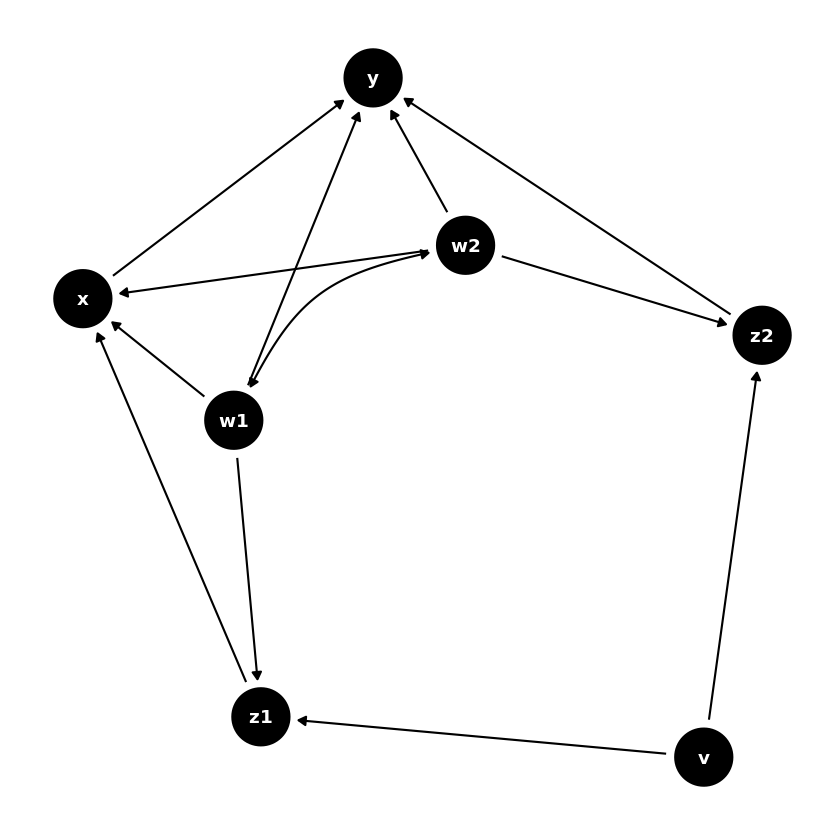

In [3]:
ggdag(tidy_ggdag) +
  theme_dag()

In [ ]:
platform type ~ age + gender
